# Developing a Customer Churn Prediction Model for SyriaTel Telecommunications Company

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

In [2]:
# Read the CSV file into a DataFrame
df=pd.read_csv("bigml_59c28831336c6604c800002a.csv")

# Displaying the first 10 rows
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [3]:
# Displaying columns of our dataframe
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [4]:
# Displaying the rows and columns within our dataframe
df.shape

(3333, 21)

## Data Cleaning

In [5]:
# Retrieve information on columns, data types, non_null count of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

There are no null values

In [6]:
# Check if there any duplicated rows
df.duplicated().sum()

0

There are no duplicates

In [7]:
# Get the count of unique values in the "churn" column
df["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [8]:
# Iterating over each column to print unique values in each column.
columns=df.columns
for col in columns:
    print(col, df[col].unique())

state ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
account length [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  

In [9]:
# Selecting numerical columns with float data type
numerical_columns=df.select_dtypes(include=["float"])

In [10]:
# Rounding the values to decimal places for data uniformity
numerical_columns.round(2).head(10)

,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl charge
0,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70
1,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70
2,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29
3,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78
4,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73
5,223.4,37.98,220.6,18.75,203.9,9.18,6.3,1.70
6,218.2,37.09,348.5,29.62,212.6,9.57,7.5,2.03
7,157.0,26.69,103.1,8.76,211.8,9.53,7.1,1.92
8,184.5,31.37,351.6,29.89,215.8,9.71,8.7,2.35
9,258.6,43.96,222.0,18.87,326.4,14.69,11.2,3.02


<Axes: >

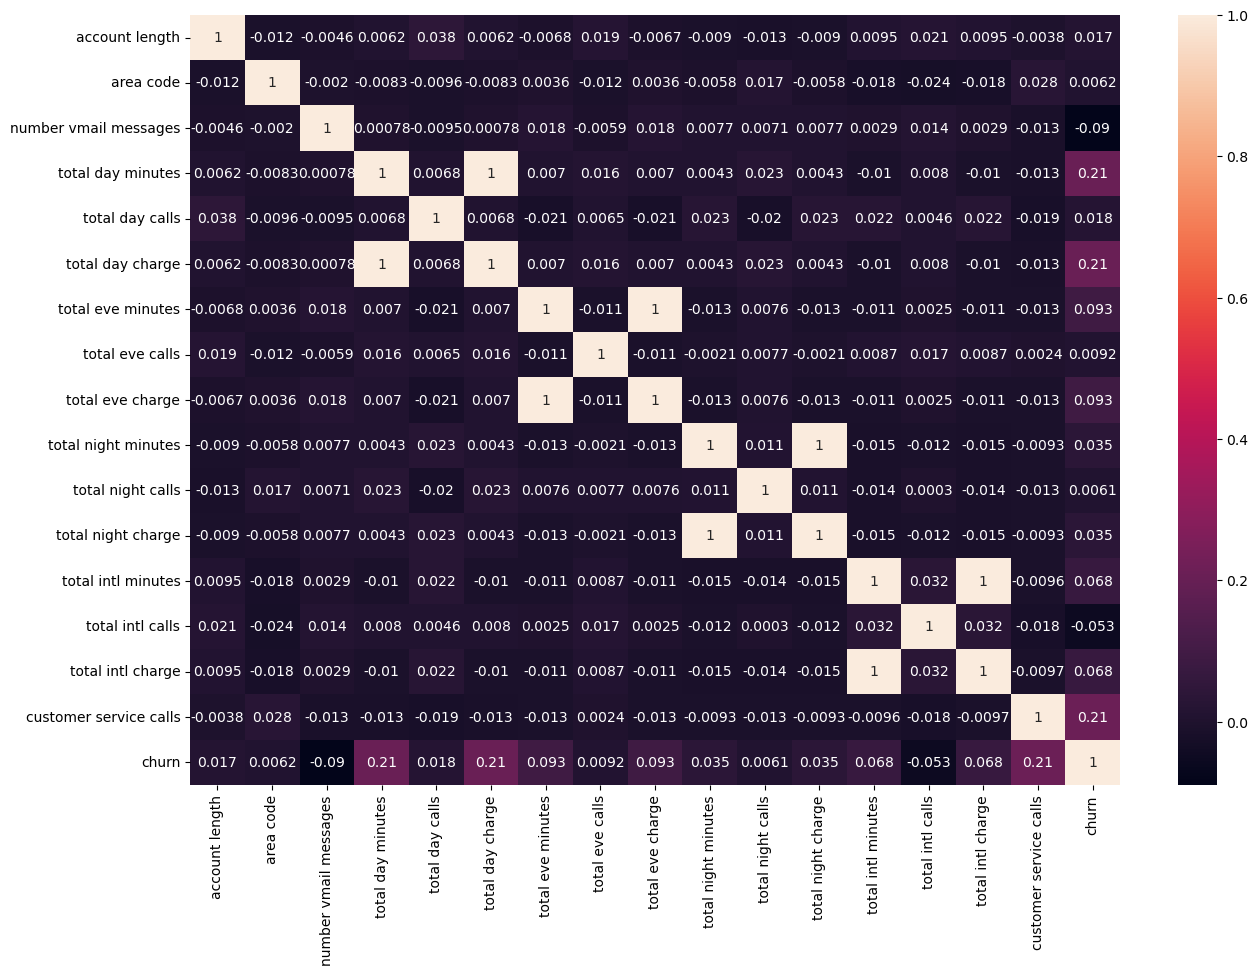

In [11]:
corr_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(data=corr_matrix, annot=True)

In [12]:
df.corr(numeric_only=True)['churn']

account length            0.016541
area code                 0.006174
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

From the above results  these correlation results provide valuable insights into the relationship between different features and churn behavior, either being positive correlated or negative.

From correlations results, it is recommended that future studies be done to explain causation because correlation shows causality and not causation  

## Data Visualization

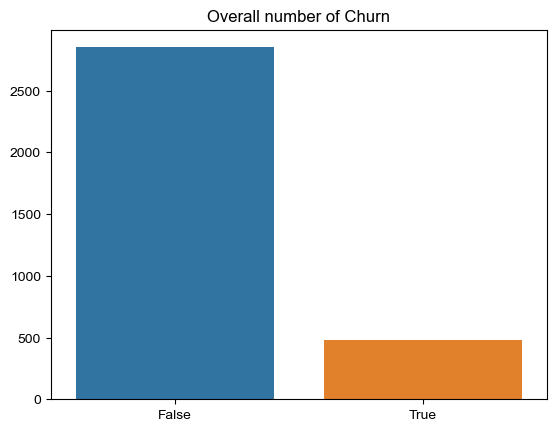

Overall Churn rate is  14.49 %


In [13]:
# calculating overall churn rate
churn = df['churn'].value_counts()
sns.barplot(x=churn.index, y=churn.values)
plt.title('Overall number of Churn')
sns.set_style('whitegrid')  
plt.show()

churn_rate = ((sum(df['churn'] == True)/ len(df['churn'])*100))
print('Overall Churn rate is ', round(churn_rate, 2), '%')

<Axes: xlabel='international plan'>

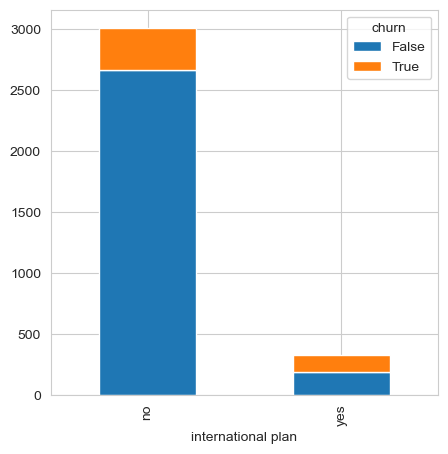

In [14]:
#Visualizing the distribution of churned and non-churned customers grouped by their international plan.
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

 From the category international plan, a higher percentage are not subscribed to the plan. From those who are not subscribed, a smaller number churned. Of the international plan subscribers, a smaller section churned.

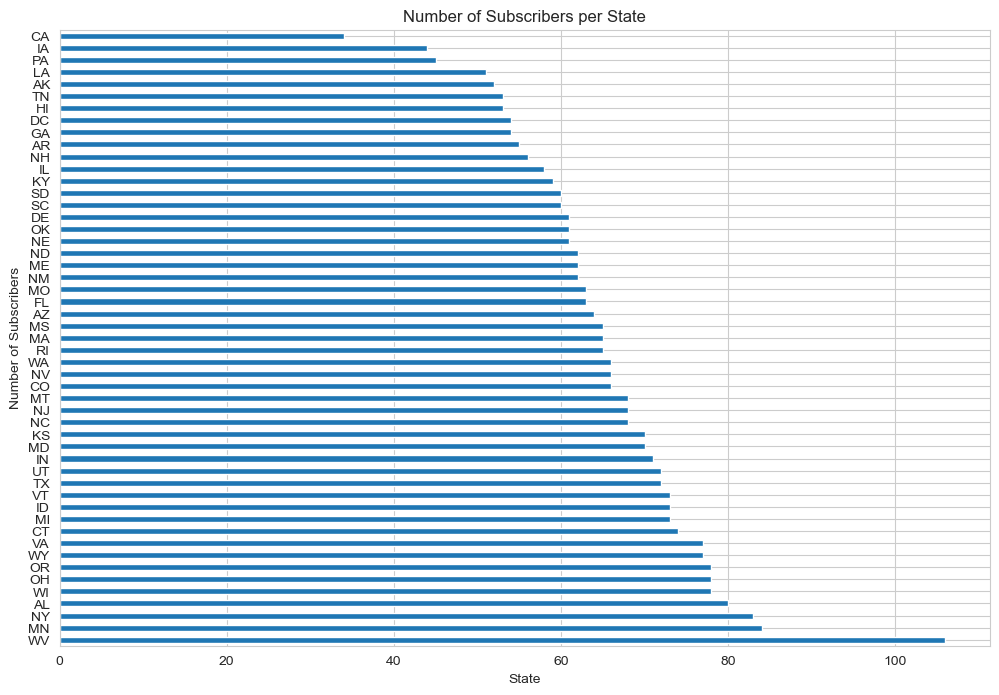

In [15]:
# Visualizing number of subscribes per state
plt.figure(figsize=(12, 8))
df['state'].value_counts().plot(kind='barh')
plt.title('Number of Subscribers per State')
plt.xlabel('State')
plt.ylabel('Number of Subscribers')
plt.show()

From the above graph most subscribers are based on the WV state.

<Axes: xlabel='voice mail plan'>

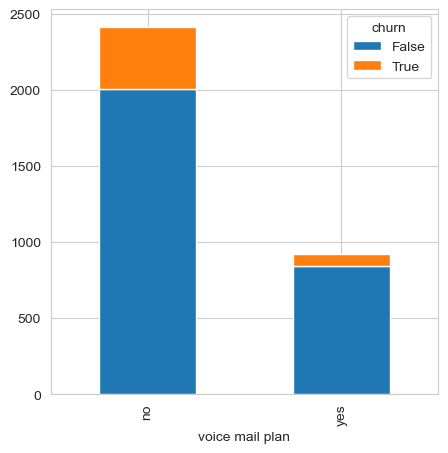

In [16]:
#Visualizing the distribution of churned and non-churned customers grouped by their voice mail plan subscription.
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

From the category voice mail plan, a higher percentage are not subscribed to the plan. From those who are not subscribed, a smaller number churned. Of the voice plan subscribers, a smaller section churned.

<Axes: xlabel='state'>

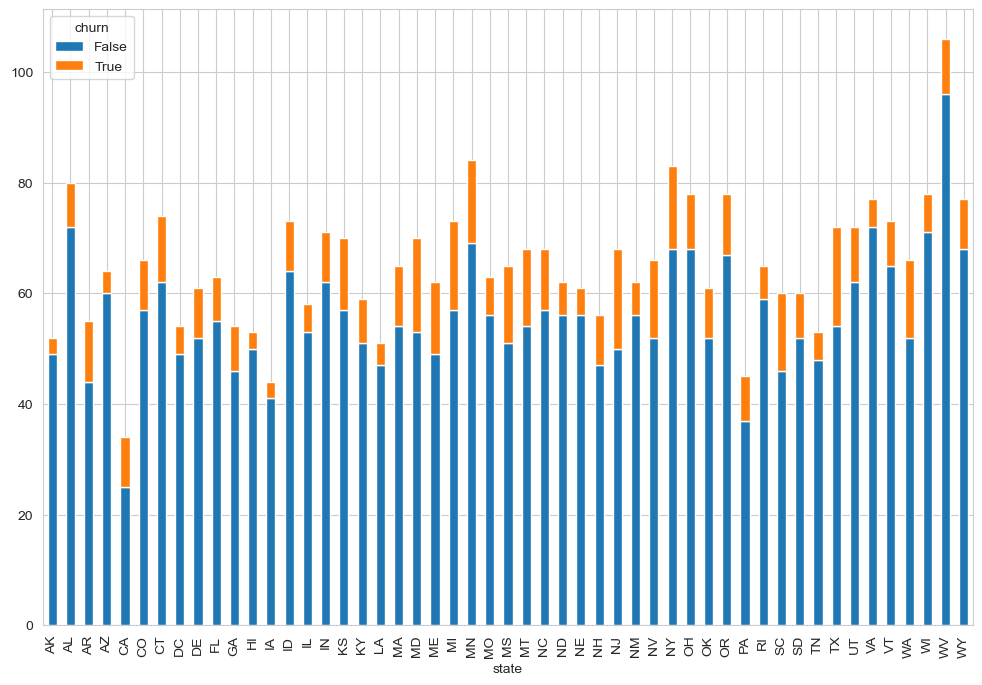

In [17]:
#Visualizing the distribution of churned and non-churned customers grouped by their location, ie the state.
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(12,8))

Generally in all the states, most people did not churn.

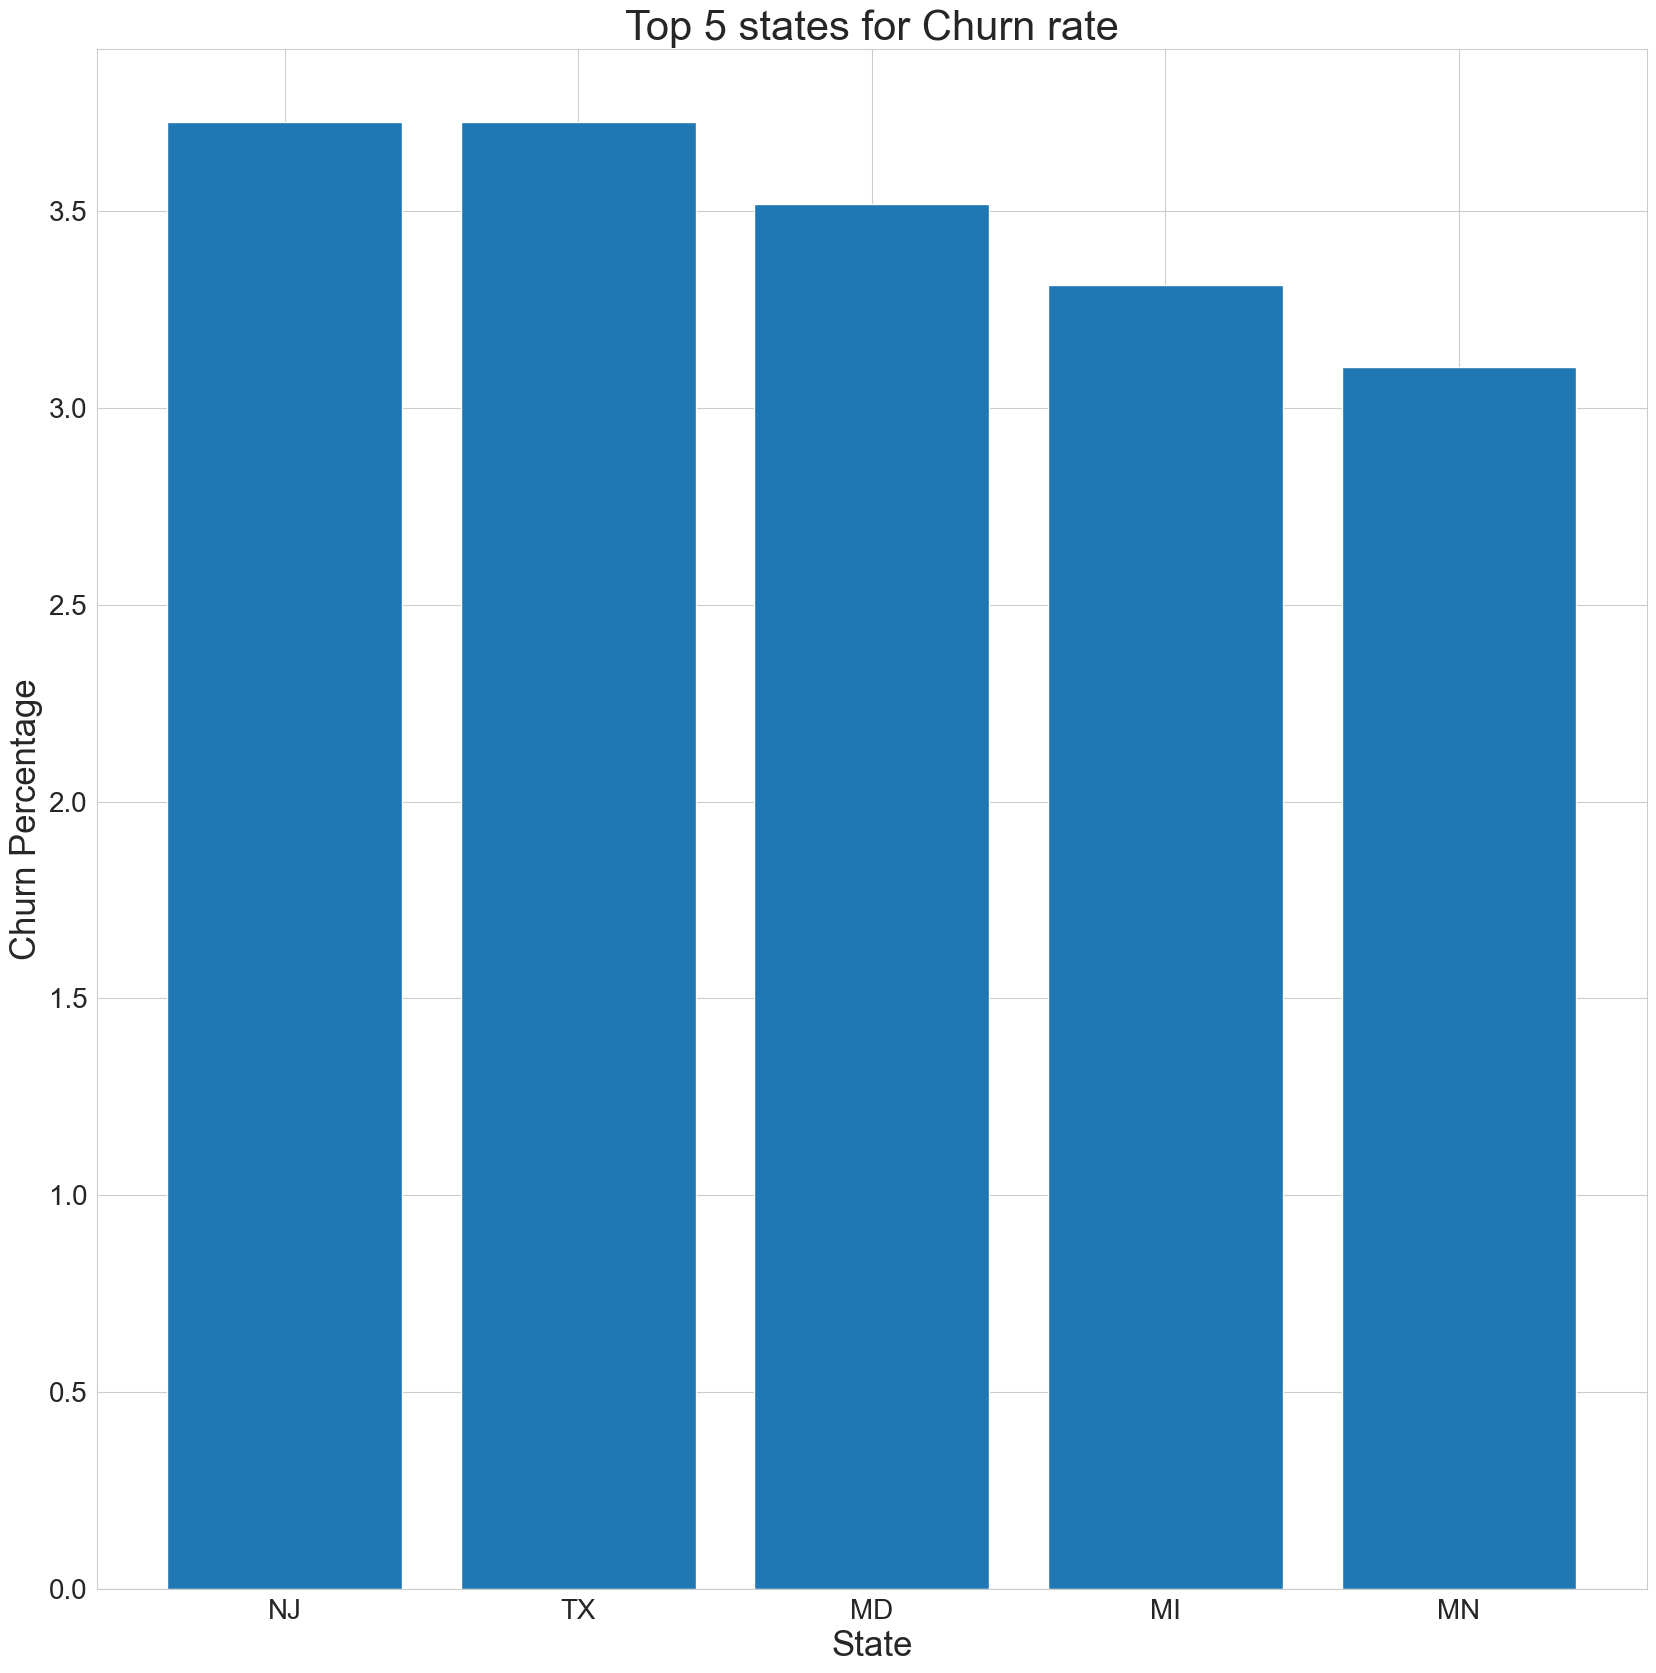

In [18]:
state_grouped = df.groupby(["state", "churn"]).size().unstack().reset_index()
sum_all_states = state_grouped[True].sum()
state_grouped['churn_percentage'] = (state_grouped[True] / sum_all_states) * 100
state_grouped.sort_values(by ='churn_percentage', ascending = False, inplace = True)
top_five_churn = state_grouped[:5]

fig, ax = plt.subplots(figsize=(20,20))
plt.bar(top_five_churn['state'], top_five_churn['churn_percentage'])
plt.title('Top 5 states for Churn rate', fontsize = 30)

ax.set_xlabel("State",fontsize=25)
ax.set_ylabel("Churn Percentage",fontsize=25)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
sns.set_style('whitegrid')  

Top 5 states with the highest churn rates are NJ, TX, MD, MI and MN

<Axes: xlabel='customer service calls'>

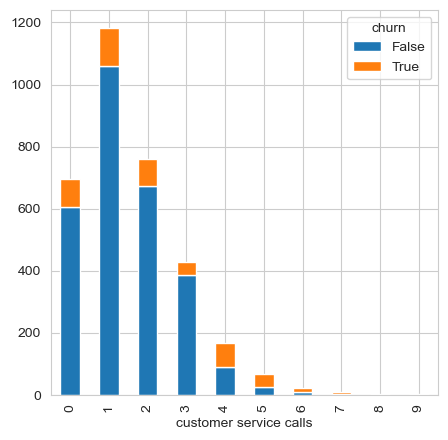

In [19]:
#Visualizing the distribution of churned and non-churned customers grouped by the customer service call they make.
df.groupby(["customer service calls", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

Most of the subscribers do make one customer service call. With subscribers having one customer service call churning the most.

<Axes: xlabel='area code'>

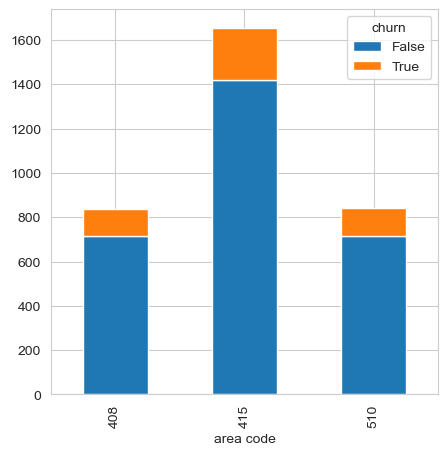

In [20]:
#Visualizing the distribution of churned and non-churned customers grouped by their Area Code.
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

From the visualization above most of the subscribers did not churn.
With area code 415 having a higher number of subscribers who churned.

# Modeling

### Data Transformation

In [21]:
# methods used: laber encoder
#Transforming categorical variables into numerical variables

label = LabelEncoder()

df['state'] = label.fit_transform(df['state'])
df['international plan'] = label.fit_transform(df['international plan'])
df['voice mail plan'] = label.fit_transform(df['voice mail plan'])
df['churn'] = label.fit_transform(df['churn'])

# Change the data types to int
df['state'] = df['state'].astype(int)
df['international plan'] = df['international plan'].astype(int)
df['voice mail plan'] = df['voice mail plan'].astype(int)
df['churn'] = df['churn'].astype(int)

In [22]:
# Selecting the Independent Variables (X) and Target Variable (y)
X = df.drop(columns=['state','churn','phone number'], axis=1)
y = df['churn']

In [23]:
# Spliting the dataset into training and testing sets using a 75-25 ratio,
#ensuring reproducibility with a fixed random state of 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Logistic Regression

In [24]:
# Using Pipeline for machine learning.
# Using MinMaxScaler for feature Scalling
# Using Logistic Regression as our model

logistic_pipeline = Pipeline([('mms', MinMaxScaler()),
                              ('LR', LogisticRegression(fit_intercept=False, solver='liblinear', max_iter=12000, random_state=42))])

In [25]:
# Fitting the logistic regression model to the train dataset
logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('mms', MinMaxScaler()),
                ('LR',
                 LogisticRegression(fit_intercept=False, max_iter=12000,
                                    random_state=42, solver='liblinear'))])

In [26]:
# Checking for class imbalance.
y_train.value_counts()

0    2141
1     358
Name: churn, dtype: int64

From the results above there is a class imbalance issue with majority of class being '0'  
There is need to balance the classes to improve accuracy

In [27]:
# Evaluating the accuracy score for train and test data
accuracy_train=logistic_pipeline.score(X_train, y_train)
accuracy_test=logistic_pipeline.score(X_test, y_test)
print(f"Accuracy score for train: {accuracy_train}",
     "\n\n",f"Accuracy score for test: {accuracy_test}")

Accuracy score for train: 0.8623449379751901 

 Accuracy score for test: 0.8501199040767387


AUC 0.7609139633286318


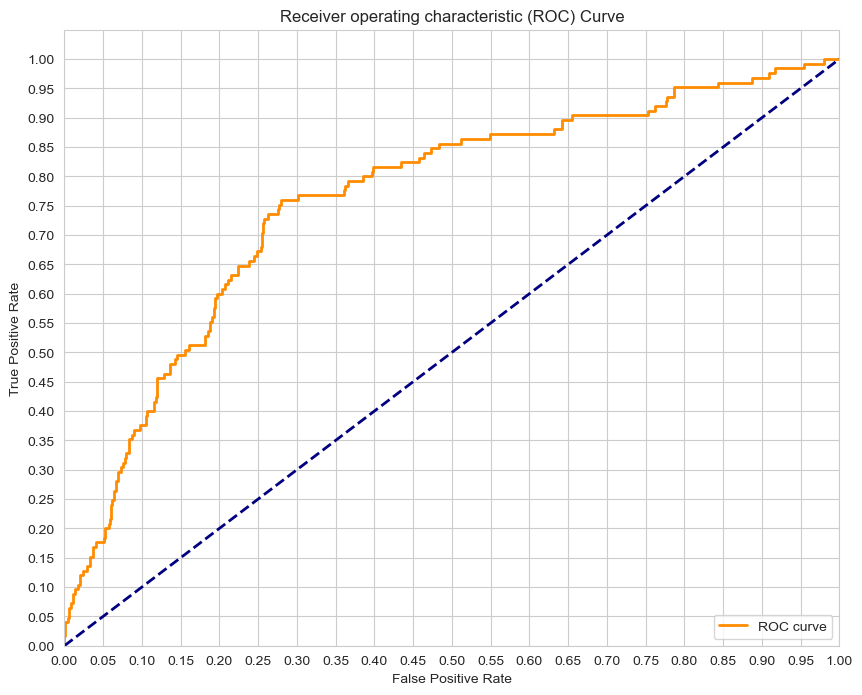

In [28]:
# Plotting the AUC curve
y_score = logistic_pipeline.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('AUC', auc(fpr,tpr))

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

###### Improving the logistic model

In [29]:
# Using SMOTE to deal with class imbalance
#SMOTE contributes to more accurate predictions and better model performance
from imblearn.over_sampling import SMOTE

print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

0    2850
1     483
Name: churn, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

0    2141
1    2141
Name: churn, dtype: int64


In [30]:
#  Logistic Regression model using balanced classes
logistic_pipeline_resampled = Pipeline([('mms', MinMaxScaler()),
                                        ('LR', LogisticRegression(fit_intercept = False, solver = 'liblinear', max_iter = 12000, random_state=42))])

In [31]:
# Fitting the model.
logistic_pipeline_resampled.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('mms', MinMaxScaler()),
                ('LR',
                 LogisticRegression(fit_intercept=False, max_iter=12000,
                                    random_state=42, solver='liblinear'))])

In [32]:
# Evaluating the accuracy score of the model on the testing data
accuracy_train_resampled=logistic_pipeline_resampled.score(X_train_resampled, y_train_resampled)
accuracy_test_resampled=logistic_pipeline_resampled.score(X_test, y_test)
print(f"Accuracy score for train: {accuracy_train_resampled}",
     "\n\n",f"Accuracy score for test: {accuracy_test_resampled}")

Accuracy score for train: 0.7274638019617001 

 Accuracy score for test: 0.7122302158273381


AUC_Balanced: 0.7772411847672778


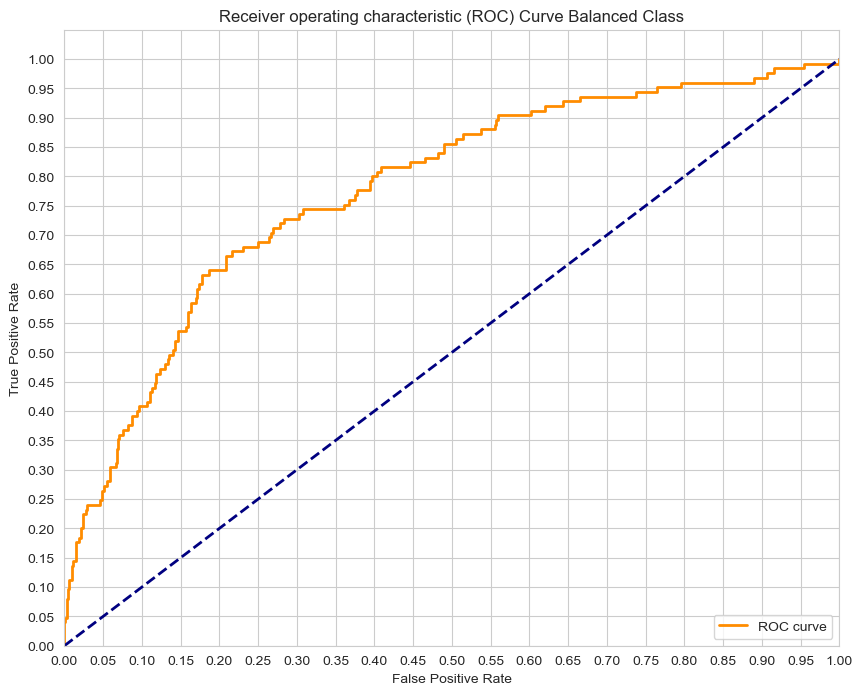

In [33]:
# Computing for the AUC metric for model evaluation
y_score_resampled = logistic_pipeline_resampled.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score_resampled)
print('AUC_Balanced:', auc(fpr,tpr))

# Plotting AUC curve after dealing with class imbalance
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve Balanced Class')
plt.legend(loc='lower right')
plt.show()

##### Tuning model: Hyperparameterization

In [34]:
#using GridSearchCV to tune hyperparameters of the model,
#Aiming to find the optimal combination of hyperparameters to maximizes the model's performance.

logistic_grid = [{'LR__C':[0.1, 1, 50, 2000, 1e8, 1e15],
                  'LR__penalty': ['l1', 'l2'],
                  'LR__solver' : ['liblinear', 'saga']}]

logistic_gridsearch = GridSearchCV(logistic_pipeline_resampled, logistic_grid, cv=3)

In [35]:
# Fitting the model.
logistic_gridsearch.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('LR',
                                        LogisticRegression(fit_intercept=False,
                                                           max_iter=12000,
                                                           random_state=42,
                                                           solver='liblinear'))]),
             param_grid=[{'LR__C': [0.1, 1, 50, 2000, 100000000.0,
                                    1000000000000000.0],
                          'LR__penalty': ['l1', 'l2'],
                          'LR__solver': ['liblinear', 'saga']}])

In [36]:
# Evaluating the accuracy score of the model 
accuracy_train_grid=logistic_gridsearch.score(X_train_resampled, y_train_resampled)
accuracy_test_grid=logistic_gridsearch.score(X_test, y_test)
print(f"Accuracy score for train: {accuracy_train_grid}",
     "\n\n",f"Accuracy score for test: {accuracy_test_grid}")

Accuracy score for train: 0.7279308734236338 

 Accuracy score for test: 0.7170263788968825


AUC_LR_Gridsearch: 0.7775232722143863


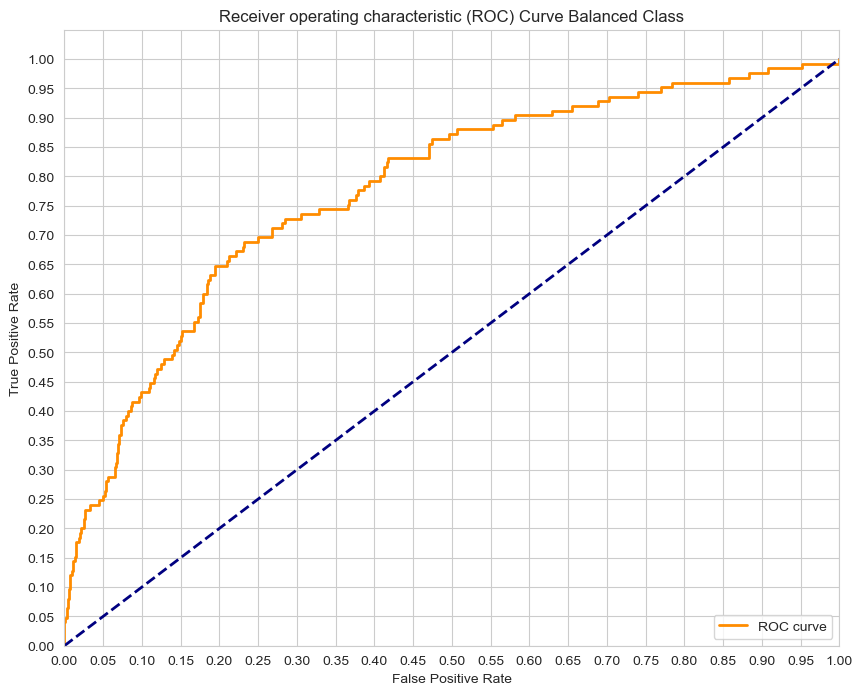

In [37]:
# Computing AUC
y_score_gridsearch = logistic_gridsearch.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score_gridsearch)
print('AUC_LR_Gridsearch:', auc(fpr,tpr))

# Displaying the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve Balanced Class')
plt.legend(loc='lower right')
plt.show()

After parameter tuning, the training accuracy increased slightly from 0.7275 (72.75%) to 0.7279 (72.79%) while testing accuracy also increased slightly from 0.7122 (71.22%) to 0.7170 (71.70%) indicating an improvement in model performance.

The AUC increased slightly from 0.7772 to 0.7775 after parameter tuning, indicating an improvement in the model's ability to distinguish between positive and negative classe

However, further optimization using more advanced models may be needed for significant improvements.

## Decision Tree

In [38]:
# building the Decision Tree model
DT_pipeline = Pipeline([('mms', MinMaxScaler()),
                        ('dt', DecisionTreeClassifier(random_state=42))])

In [39]:
#Fitting the model
DT_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('mms', MinMaxScaler()),
                ('dt', DecisionTreeClassifier(random_state=42))])

In [40]:
# Evaluating the accuracy score of the model on the testing data
train_score=DT_pipeline.score(X_train_resampled, y_train_resampled)
test_score= DT_pipeline.score(X_test, y_test)

print(f"Accuracy score for train: {train_score}",
     "\n\n",f"Accuracy score for test: {test_score}")

Accuracy score for train: 1.0 

 Accuracy score for test: 0.8333333333333334


AUC_dt: 0.780067700987306


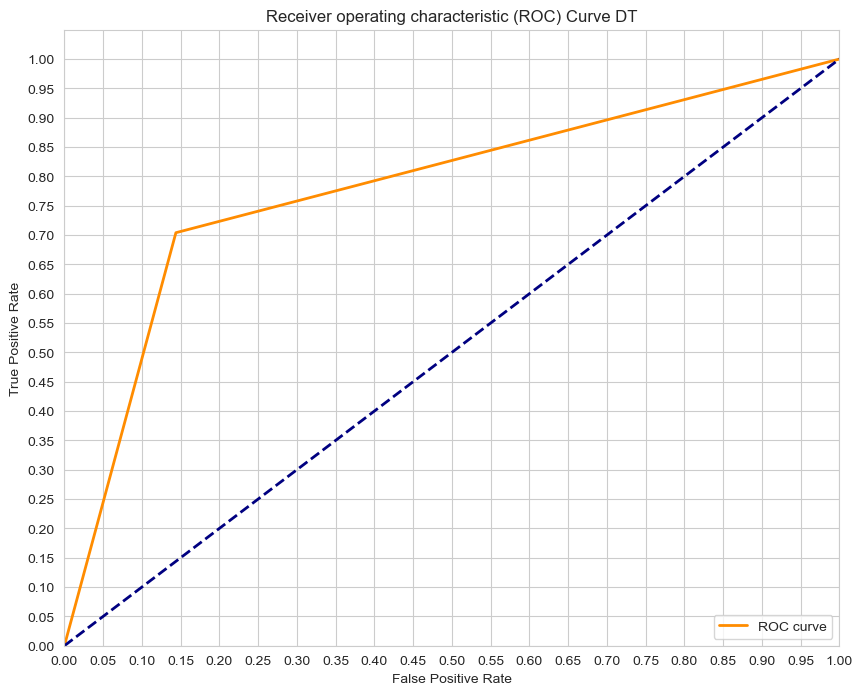

In [41]:
# Visualing the AUC curve
y_score_DT = DT_pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score_DT)
print('AUC_dt:', auc(fpr,tpr))

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve DT')
plt.legend(loc='lower right')
plt.show()

**Tuning to improve the model**

In [42]:
#using GridSearchCV to tune hyperparameters our model,
#Aiming to find the optimal combination of hyperparameters that maximizes the model's performance.
DT_grid = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [None, 2, 3, 4, 5, 6], 
    'dt__min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'dt__min_samples_split': [2, 5, 6, 10],
    'dt__random_state': [42]
}

# Perform Grid Search with cross-validation
Decision_Tree_gridsearch = GridSearchCV(DT_pipeline, DT_grid, cv=3)

In [43]:
#fit the model
Decision_Tree_gridsearch.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [None, 2, 3, 4, 5, 6],
                         'dt__min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'dt__min_samples_split': [2, 5, 6, 10],
                         'dt__random_state': [42]})

In [44]:
#evaluate model performance 
train_score= Decision_Tree_gridsearch.score(X_train_resampled, y_train_resampled)
test_score=Decision_Tree_gridsearch.score(X_test, y_test)

print(f"Accuracy score for train: {train_score}",
     "\n\n",f"Accuracy score for test: {test_score}")

Accuracy score for train: 1.0 

 Accuracy score for test: 0.854916067146283


AUC_dt_gridsearch: 0.8026459802538787


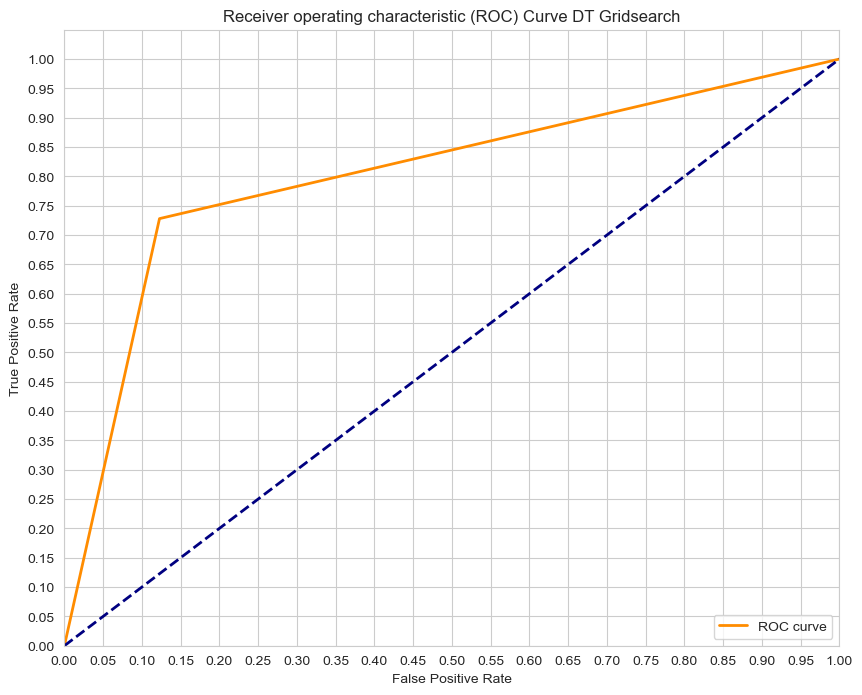

In [45]:
y_score_dt_gridsearch = Decision_Tree_gridsearch.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score_dt_gridsearch)
print('AUC_dt_gridsearch:', auc(fpr,tpr))

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve DT Gridsearch')
plt.legend(loc='lower right')
plt.show()

The models exhibit signs of overfitting with perfect training accuracy (1.0) but lower testing accuracy, indicating memorization of the training data.

However, after parameter tuning, the testing accuracy improved from 0.8333 (83.33%) to 0.8549 (85.49%) suggesting improved generalization to unseen data hence improved model performance.

The AUC (Area Under the ROC Curve) increased from 0.7801 to 0.8026 after parameter tuning, indicating an improvement in the model's ability to distinguish between positive and negative classes.

Further optimization may be necessary to achieve optimal balance between model performance, generalization and to reduce overfitting by using a more advanced model like the Random Tree Classifier

In [46]:
def plot_feature_importances(model):
    n_features = X_train_resampled.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train_resampled.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [47]:
 Decision_Tree_gridsearch.best_params_

{'dt__criterion': 'entropy',
 'dt__max_depth': None,
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__random_state': 42}

In [48]:
optimal_dt = DecisionTreeClassifier(criterion = 'entropy',
 max_depth = None,
 min_samples_leaf = 1,
 min_samples_split = 2,
 random_state = 42)
optimal_dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', random_state=42)

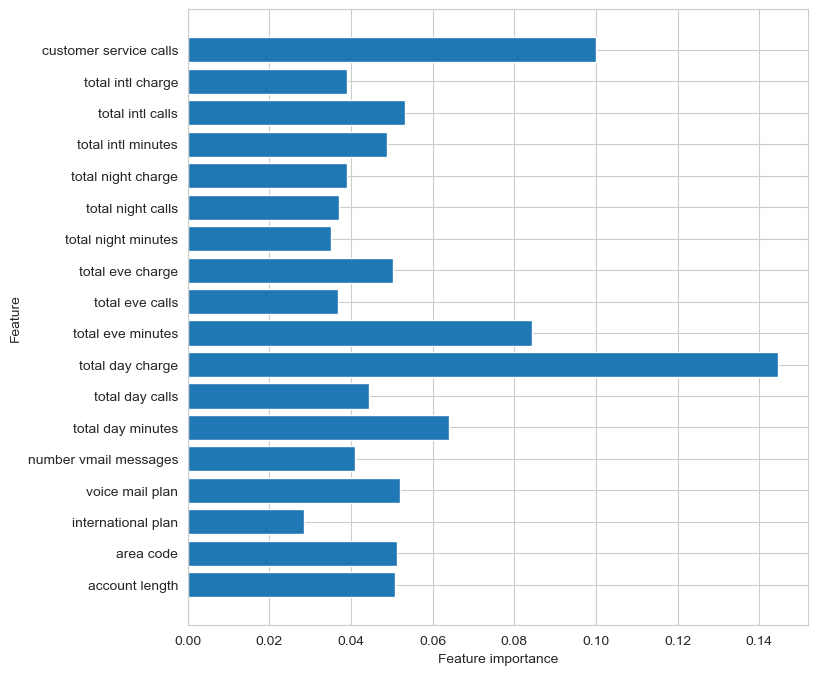

In [49]:
plot_feature_importances(optimal_dt)

Customer service calls, total day charge and total eve minutes are the most important features in determining whether a customer will churn or not.

## Random Forest Classifier

In [50]:
#Random Forest pipeline
rf_pipeline = Pipeline([('mms', MinMaxScaler()),
                        ('RF', RandomForestClassifier(random_state=42))])

In [51]:
#fit the training data
rf_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('mms', MinMaxScaler()),
                ('RF', RandomForestClassifier(random_state=42))])

In [52]:
#evaluate model performance 
train_score= rf_pipeline.score(X_train_resampled, y_train_resampled)
test_score=rf_pipeline.score(X_test, y_test)

print(f"Accuracy score for train: {train_score}",
     "\n\n",f"Accuracy score for test: {test_score}")

Accuracy score for train: 1.0 

 Accuracy score for test: 0.920863309352518


AUC_rf: 0.9132581100141044


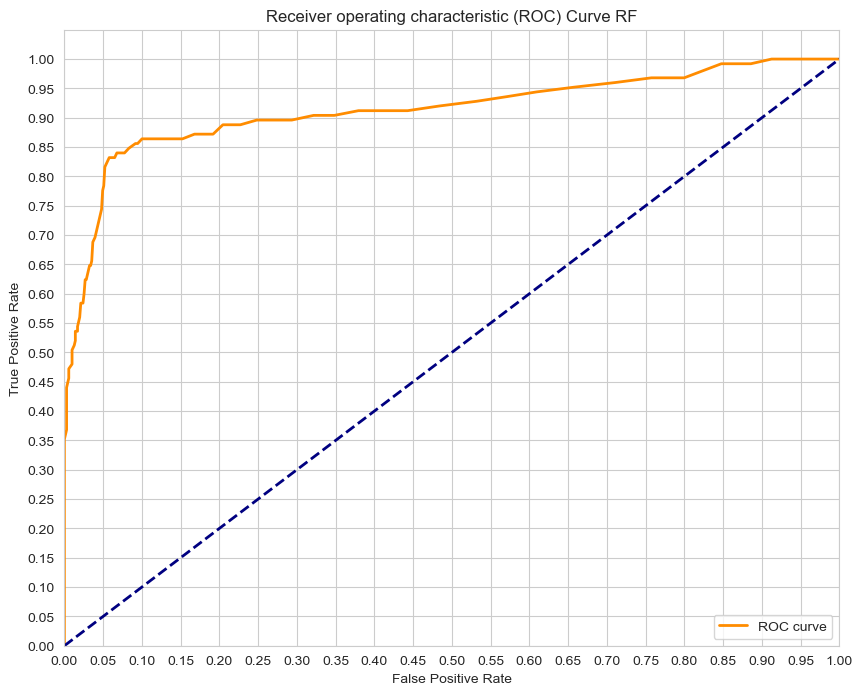

In [53]:
#Visualizing the auc score
y_score_rf = rf_pipeline.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score_rf)
print('AUC_rf:', auc(fpr,tpr))

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve RF')
plt.legend(loc='lower right')
plt.show()

In [54]:
#Tuning the parameters of the model
rf_grid = {
    "RF__n_estimators": [10, 30, 100],
    "RF__criterion": ["gini", "entropy"],
    "RF__max_depth": [None, 2, 6, 10],
    "RF__min_samples_split": [5, 10],
    "RF__min_samples_leaf": [3, 6],
}

rf_gridsearch = GridSearchCV(rf_pipeline, rf_grid, cv=3)

In [55]:
#fitting the model
rf_gridsearch.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('RF',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'RF__criterion': ['gini', 'entropy'],
                         'RF__max_depth': [None, 2, 6, 10],
                         'RF__min_samples_leaf': [3, 6],
                         'RF__min_samples_split': [5, 10],
                         'RF__n_estimators': [10, 30, 100]})

In [56]:
#evaluate model performance 
train_score= rf_gridsearch.score(X_train_resampled, y_train_resampled)
test_score=rf_gridsearch.score(X_test, y_test)

print(f"Accuracy score for train: {train_score}",
     "\n\n",f"Accuracy score for test: {test_score}")

Accuracy score for train: 0.9915927136851939 

 Accuracy score for test: 0.9220623501199041


AUC_rf_gridsearch: 0.9097658674188999


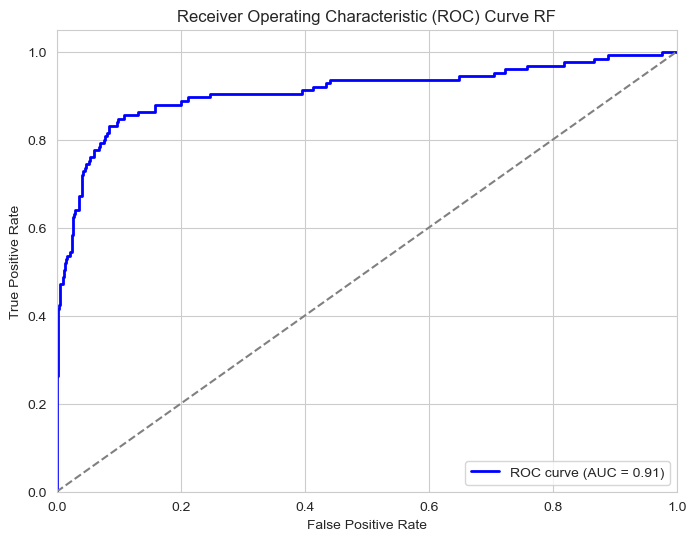

In [57]:
#Calculating and visiualizing ROC
y_prob_rf_grid = rf_gridsearch.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf_grid)

# Compute ROC AUC score
roc_auc_rf_grid = roc_auc_score(y_test, y_prob_rf_grid)
# Print ROC AUC score
print('AUC_rf_gridsearch:', roc_auc_rf_grid)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf_grid)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve RF')
plt.legend(loc='lower right')
plt.show()

The model initially achieved perfect training accuracy (1.0), indicating potential overfitting, and a testing accuracy of 0.9209 (92.09%).

After parameter tuning, the training accuracy decreased slightly to 0.9916, suggesting a reduction in overfitting and increased generalization ability.

However, the testing accuracy increased to 0.9221 (92.21%) after parameter tuning indicating an improvement in the model's generalization performance on unseen data.

The AUC, however, decreased from 0.9133 to 0.9098 after parameter tuning indicating a slight deterioration in the model's ability to distinguish between positive and negative classes. This suggests that the tuning process may have negatively impacted the model's discriminatory power. Despite the decrease, the AUC is still high and indicates the model's effectiveness/ ability in distinguishing between positive and negative classes

Further optimization may be necessary to achieve optimal balance between model performance and generalization using a more advanced model like Gradient Boosting Classifier

In [58]:
#Obtain the best parameters from the grid
rf_gridsearch.best_params_

{'RF__criterion': 'gini',
 'RF__max_depth': None,
 'RF__min_samples_leaf': 3,
 'RF__min_samples_split': 5,
 'RF__n_estimators': 100}

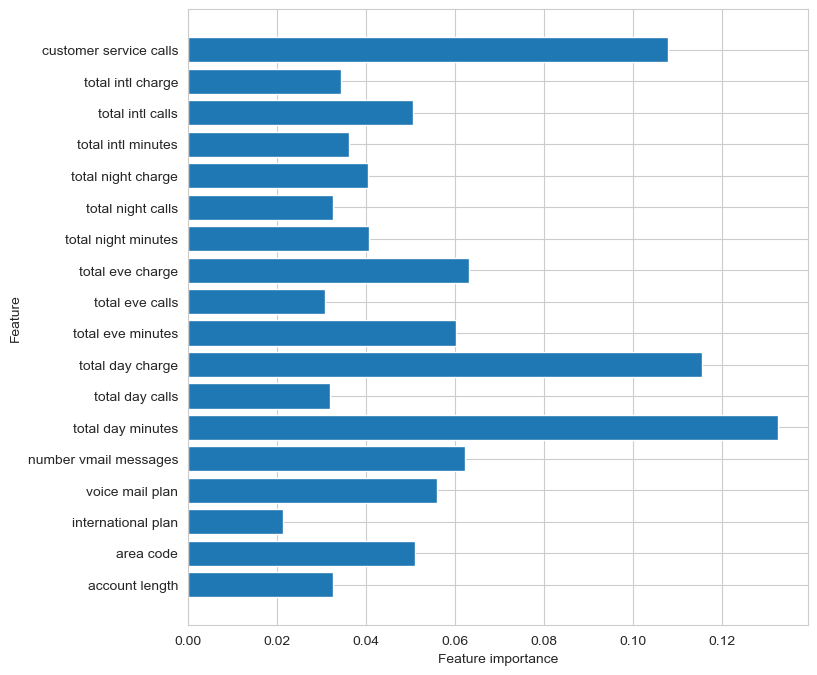

In [59]:
#Obtaining the optimal Random Forest Classifier
optimal_rf = RandomForestClassifier(criterion= 'gini',
 max_depth= None,
 min_samples_leaf =  3,
 min_samples_split = 5,
 n_estimators = 100)

#fitting the ptimal model
optimal_rf.fit(X_train_resampled, y_train_resampled)

plot_feature_importances(optimal_rf)

Customer service calls, total day charge, and total day minutes are the most important features in determining whether a customer will churn or not

## Gradient Boosting Classifier

In [60]:
## import Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
#create a model
gb_pipeline = Pipeline([('mms', MinMaxScaler()),
                        ('GB', GradientBoostingClassifier(random_state=42))])

In [62]:
#fit the model
gb_pipeline.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('mms', MinMaxScaler()),
                ('GB', GradientBoostingClassifier(random_state=42))])

In [63]:
#evaluate model performance 
train_score= gb_pipeline.score(X_train_resampled, y_train_resampled)
test_score=gb_pipeline.score(X_test, y_test)

print(f"Accuracy score for train: {train_score}",
     "\n\n",f"Accuracy score for test: {test_score}")

Accuracy score for train: 0.9098552078468005 

 Accuracy score for test: 0.9100719424460432


AUC_gb: 0.909179125528914


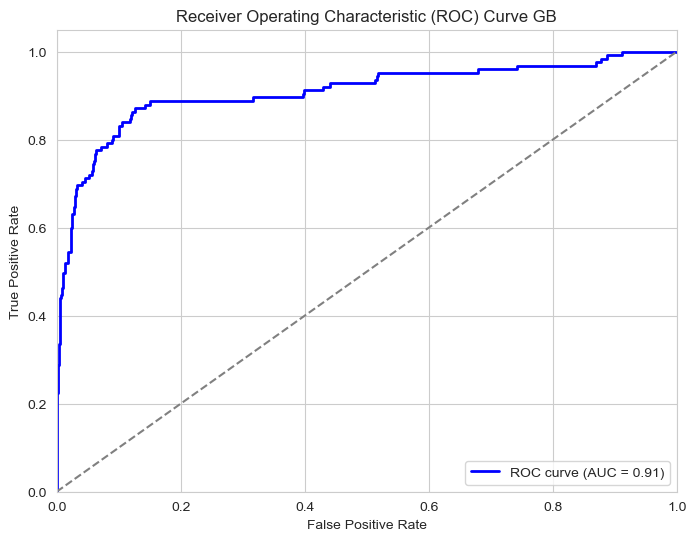

In [64]:
#Calculating and visiualizing ROC
y_prob_gb = gb_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_gb)

# Compute ROC AUC score
roc_auc_gb_pipeline = roc_auc_score(y_test, y_prob_gb)
# Print ROC AUC score
print('AUC_gb:', roc_auc_gb_pipeline)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_rf_grid)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve GB')
plt.legend(loc='lower right')
plt.show()

Both the training and testing accuracy scores are relatively high, with the training accuracy at 0.9166 and the testing accuracy at 0.9221. This indicates that the model performs well on both the data it was trained on and unseen data.

Despite a slightly lower AUC(90.92%) compared to Random Forest (90.98%), the model's performance is still impressive and indicates its effectiveness / ability to distinguish between positive and negative classes.

Nevertheless, the close proximity of the training and testing accuracies suggests that the model generalizes well to unseen data, without overfitting to the training set. Overall, these results indicate that the model is robust and performs well in classifying the data, demonstrating its effectiveness in making accurate predictions.

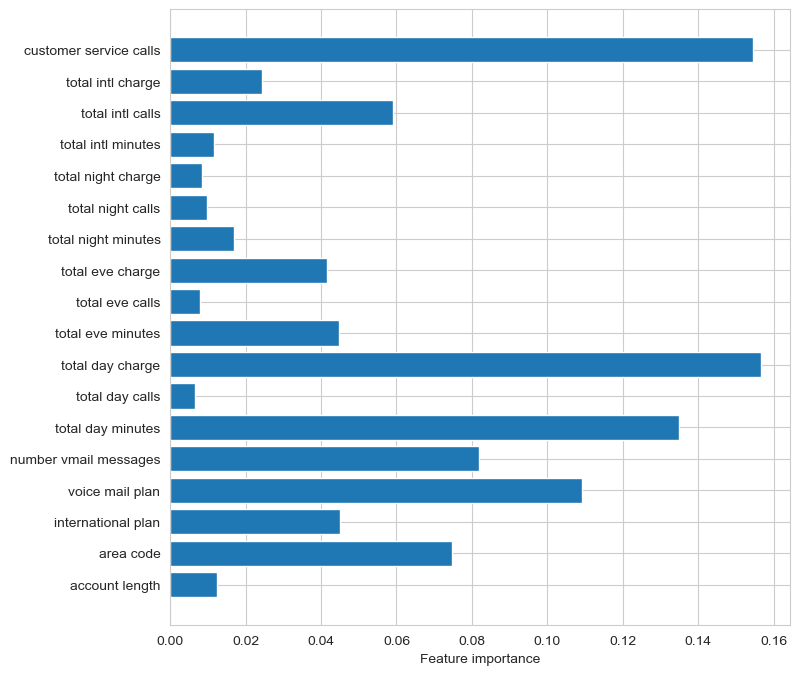

In [65]:
#Feature Importance-GB
def plot_feature_importances_gb(model):
    final_model = model.steps[-1][1]
    n_features = X_train_resampled.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), final_model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train_resampled.columns.values)
    plt.xlabel('Feature importance')
    plt.show()

plot_feature_importances_gb(gb_pipeline)

Customer service calls, total day charge, total day minutes and voice mail plan are the most important features in determining whether a customer will churn or not.

# Conclusion

After running the data through Logistic Regression, Decision Tree, Random Forest and Gradient Boosting Classifier and tuning the hyperparameters, the Gradient Boosting Classifier yielded the best results with a training accuracy at 0.9099(90.99%) and the testing accuracy at 0.9101(91.01%).
This indicates that the model performs well on both the data it was trained on and unseen data.

Overall, the Gradient Boosting model demonstrates strong performance with high accuracy and AUC scores on both the training and testing sets, indicating its effectiveness in making accurate predictions.